# Data Science 
## Supervised Learning I
### Case Study 2

### Objectives: 
* Learn to handle missing values 
* Learn to fit a DT decision tree and compare its accuracy with a RF random forest 
classifier. 

In [80]:
import pandas as pd
import numpy as np

data = pd.read_csv('horse.csv')
print("Data information: ")
data.info()

# Check Missing Values
# Count missing values in each column
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

print("\nPrint the first 5 rows:")
print(data.head())

Data information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    

### Understanding the Data
The dataset contains 299 samples (rows) and 28 columns (features), which include a mix of:
* Categorical variables (e.g., surgery, outcome, age).
* Numerical variables (e.g., rectal_temp, pulse).
* Missing values across many columns.

The goal is to predict the survival of a horse (outcome) based on medical observations.

### Describing the Columns
#### Target Variable
* outcome: The survival status of the horse. It has three categories: lived, died, and euthanized.
#### Other Features
* Categorical (17 columns):
  * Examples: surgery, age, temp_of_extremities, peripheral_pulse, surgical_lesion.

* Numerical (7 columns):
  * Examples: rectal_temp, pulse, packed_cell_volume.

* Other Metadata Columns (4 columns):
  * Examples: hospital_number (likely a unique identifier), lesion_1, lesion_2, lesion_3.

### Initial Observations
* Several columns have missing values, such as:
  * rectal_temp (239 non-null out of 299).
   * nasogastric_reflux_ph (53 non-null, very sparse).
* Some features like hospital_number appear irrelevant for predicting survival.
* Categorical data needs encoding for use in machine learning models.


In [81]:
# Replace Missing Values

from sklearn.impute import SimpleImputer

# Separate categorical and numerical columns
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Replace missing values in categorical columns with the most frequent value
cat_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_cols] = cat_imputer.fit_transform(data[categorical_cols])

# Replace missing values in numerical columns with the most frequent value
num_imputer = SimpleImputer(strategy='most_frequent')
data[numerical_cols] = num_imputer.fit_transform(data[numerical_cols])


data.info()
data.head(50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    float64
 3   rectal_temp            299 non-null    float64
 4   pulse                  299 non-null    float64
 5   respiratory_rate       299 non-null    float64
 6   temp_of_extremities    299 non-null    object 
 7   peripheral_pulse       299 non-null    object 
 8   mucous_membrane        299 non-null    object 
 9   capillary_refill_time  299 non-null    object 
 10  pain                   299 non-null    object 
 11  peristalsis            299 non-null    object 
 12  abdominal_distention   299 non-null    object 
 13  nasogastric_tube       299 non-null    object 
 14  nasogastric_reflux     299 non-null    object 
 15  nasoga

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101.0,38.5,66.0,28.0,cool,reduced,normal_pink,more_3_sec,...,45.0,8.4,cloudy,2.0,died,no,11300.0,0.0,0.0,no
1,yes,adult,534817.0,39.2,88.0,20.0,cool,normal,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208.0,0.0,0.0,no
2,no,adult,530334.0,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,cloudy,2.0,lived,no,0.0,0.0,0.0,yes
3,yes,young,5290409.0,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208.0,0.0,0.0,yes
4,no,adult,530255.0,37.3,104.0,35.0,cool,normal,dark_cyanotic,more_3_sec,...,74.0,7.4,cloudy,2.0,died,no,4300.0,0.0,0.0,no
5,no,adult,528355.0,38.0,48.0,20.0,warm,normal,pale_pink,less_3_sec,...,37.0,6.5,cloudy,2.0,lived,no,0.0,0.0,0.0,no
6,yes,adult,526802.0,37.9,48.0,16.0,normal,normal,normal_pink,less_3_sec,...,37.0,7.0,cloudy,2.0,lived,yes,3124.0,0.0,0.0,no
7,yes,adult,529607.0,38.0,60.0,20.0,cool,normal,normal_pink,less_3_sec,...,44.0,8.3,cloudy,2.0,died,yes,2208.0,0.0,0.0,no
8,no,adult,530051.0,38.0,80.0,36.0,cool,absent,pale_pink,less_3_sec,...,38.0,6.2,cloudy,2.0,euthanized,yes,3205.0,0.0,0.0,no
9,no,young,5299629.0,38.3,90.0,20.0,normal,normal,normal_pink,less_3_sec,...,40.0,6.2,clear,2.2,lived,no,0.0,0.0,0.0,yes


In [82]:
# Encode Categorical Features

from sklearn.preprocessing import LabelEncoder

# Apply label encoding to categorical columns
label_encoder = LabelEncoder()

for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col].astype(str))

data.info()
data.head()
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    int64  
 1   age                    299 non-null    int64  
 2   hospital_number        299 non-null    float64
 3   rectal_temp            299 non-null    float64
 4   pulse                  299 non-null    float64
 5   respiratory_rate       299 non-null    float64
 6   temp_of_extremities    299 non-null    int64  
 7   peripheral_pulse       299 non-null    int64  
 8   mucous_membrane        299 non-null    int64  
 9   capillary_refill_time  299 non-null    int64  
 10  pain                   299 non-null    int64  
 11  peristalsis            299 non-null    int64  
 12  abdominal_distention   299 non-null    int64  
 13  nasogastric_tube       299 non-null    int64  
 14  nasogastric_reflux     299 non-null    int64  
 15  nasoga

surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
nasogastric_reflux_ph    0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
abdomo_appearance        0
abdomo_protein           0
outcome                  0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
dtype: int64

In [83]:
# Proceed with Train-Test Split and Modeling

from sklearn.model_selection import train_test_split

# Define predictors (X) and target (y)
X = data.drop(columns=['outcome'])
y = data['outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [84]:
# Train and evaluate models (Decision Tree and Random Forest)

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Train a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Evaluate the model
y_pred_dt = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")


Decision Tree Accuracy: 0.67


In [85]:
# Fit Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")


Random Forest Accuracy: 0.78


In [86]:
# Using GridSearch to Optimize the Number of Trees
# For a Random Forest, the number of trees (n_estimators) can significantly affect performance. 
# We can use GridSearchCV to find the optimal value.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [10, 25, 50, 70, 75, 80, 100, 125, 150, 200],  # Range of trees to test
    'max_depth': [None, 5, 8, 10, 12, 20, 30],        # Optional: Test different tree depths
    'random_state': [42]                    # Ensure reproducibility
}

# Initialize the Random Forest Classifier
rf = RandomForestClassifier()

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

Fitting 5 folds for each of 70 candidates, totalling 350 fits
Best Parameters: {'max_depth': 8, 'n_estimators': 200, 'random_state': 42}


In [87]:
# Evaluate the best model on the test set
best_rf_accuracy = best_rf_model.score(X_test, y_test)
print(f"Random Forest Accuracy (Best Model): {best_rf_accuracy:.2f}")


Random Forest Accuracy (Best Model): 0.74


### Objectives Reached
* Handling Missing Values: Successfully replaced missing values with the most frequent value.
* Encoding: Converted all categorical features into numerical form.
* Model Accuracy:
  * Decision Tree: Achieved an accuracy of 0.67, highlighting potential overfitting.
  * Random Forest: Tuned the number of trees to 200, resulting in an improved accuracy of 0.74 due to ensemble learning.


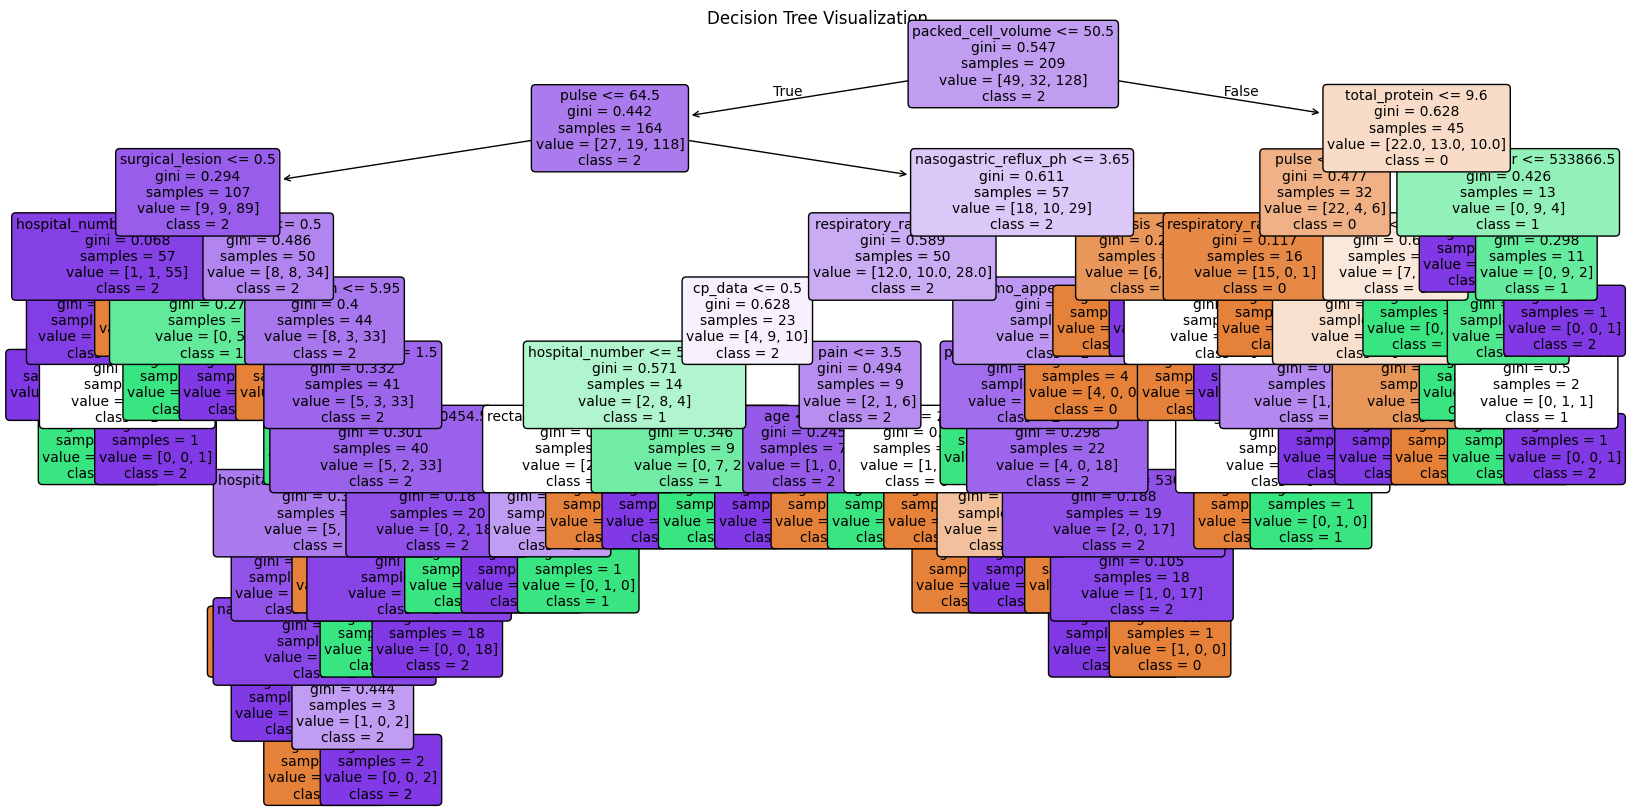

In [92]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Automatically retrieve class names
class_names = [str(cls) for cls in dt_model.classes_]

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(
    dt_model, 
    feature_names=X_train.columns, 
    class_names=class_names, 
    filled=True, 
    rounded=True, 
    fontsize=10
)
plt.title("Decision Tree Visualization")
plt.show()
